<a href="https://colab.research.google.com/github/dbtjr1103/Basic_practice/blob/main/Image_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 파일개수확인
import os
initial_count = 0
dir = "/content/drive/MyDrive/Project_image/food/images/waffles"
for path in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, path)):
        initial_count += 1
print(initial_count)

0


## Download Dataset(캐글에서 데이터셋 다운로드받기)

In [ ]:
# 캐글 설치
!pip install -q kaggle

In [ ]:
/pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/Project_image

/content/drive/MyDrive/Project_image


In [ ]:
!mkdir /content/drive/MyDrive/Project_image/food/

In [ ]:
!mkdir /content/drive/MyDrive/Project_image/landscape/

In [ ]:
# .kaggle 폴더 생성
!mkdir -p ~/.kaggle/
# kaggle.josn .kaggle로 복사
!cp kaggle.json ~/.kaggle/
# 해당 폴더 목록 확인(복사 잘 되었는지 확인)
!ls ~/.kaggle

kaggle.json


In [ ]:
cd ~

/root


In [ ]:
!ls -a

.   .bashrc  .config   .jupyter  .keras  .npm	   .tmux.conf
..  .cache   .ipython  .kaggle	 .local  .profile  .wget-hsts


In [ ]:
!ls .kaggle -al

total 16
drwxr-xr-x 2 root root 4096 Nov 23 06:14 .
drwx------ 1 root root 4096 Nov 23 06:13 ..
-rw------- 1 root root   66 Nov 23 06:14 kaggle.json


In [ ]:
cd /content/drive/MyDrive/Project_image

/content/drive/MyDrive/Project_image


In [ ]:
!kaggle datasets download -d aadityasinghal/facial-expression-dataset

 87% 53.0M/60.7M [00:00<00:00, 110MB/s]
100% 60.7M/60.7M [00:00<00:00, 114MB/s]


In [ ]:
!unzip -q facial-expression-dataset.zip

In [ ]:
!kaggle datasets download -d kmader/food41

100% 5.30G/5.30G [00:43<00:00, 156MB/s]
100% 5.30G/5.30G [00:43<00:00, 131MB/s]


In [ ]:
!unzip -uq food41.zip -d /content/drive/MyDrive/Project_image/food

In [ ]:
!kaggle datasets download -d huseynguliyev/landscape-classification

100% 121M/121M [00:01<00:00, 87.0MB/s]
100% 121M/121M [00:01<00:00, 72.6MB/s]


In [ ]:
!unzip -uq landscape-classification.zip -d /content/drive/MyDrive/Project_image/landscape

## Data handling

In [ ]:
import splitfolders

import os

import cv2
import numpy as np
from tqdm.notebook import tqdm

from matplotlib import pyplot as plt
import matplotlib.cm as cm

import tensorflow as tf

import pickle

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
from tensorflow.keras import datasets, layers, models

from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
folder_path = '/content/drive/MyDrive/Project_image/food/images'
label_names = os.listdir(folder_path)
label_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
folder_path = '/content/drive/MyDrive/Project_image/landscape/landscape/images'
label_names = os.listdir(folder_path)
label_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [ ]:
len(label_names)

6

In [ ]:
dataset = {}

# 이미지와 라벨 리스트에 담기
for label in os.listdir(folder_path):
    sub_path = folder_path+'/'+label+'/'
    dataset[label] = []
    for filename in os.listdir(sub_path):
        dataset[label].append(sub_path+filename)

dataset

{'buildings': ['/content/drive/MyDrive/Project_image/landscape/landscape/images/buildings/0.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/images/buildings/1001.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/images/buildings/1009.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/images/buildings/1012.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/images/buildings/1028.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/images/buildings/1041.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/images/buildings/1045.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/images/buildings/1055.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/images/buildings/1058.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/images/buildings/1064.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/images/buildings/1090.jpg',
  '/content/drive/MyDr

dataset 딕셔너리 
- 키 : 라벨 
- 밸류 : 이미지 경로들

In [ ]:
!mkdir resized

In [ ]:
cd /content/drive/MyDrive/Project_image/landscape/landscape

/content/drive/MyDrive/Project_image/landscape/landscape


In [ ]:
/pwd

'/content/drive/MyDrive/Project_image'

In [ ]:
cd /content/drive/MyDrive/Project_image/landscape/landscape/resized

/content/drive/MyDrive/Project_image/landscape/landscape/resized


In [ ]:
# 라벨이름 폴더 생성 
for label in label_names:
    os.mkdir(label) 

In [ ]:
dataset.items()

dict_items([('buildings', ['/content/drive/MyDrive/Project_image/landscape/landscape/images/buildings/0.jpg', '/content/drive/MyDrive/Project_image/landscape/landscape/images/buildings/1001.jpg', '/content/drive/MyDrive/Project_image/landscape/landscape/images/buildings/1009.jpg', '/content/drive/MyDrive/Project_image/landscape/landscape/images/buildings/1012.jpg', '/content/drive/MyDrive/Project_image/landscape/landscape/images/buildings/1028.jpg', '/content/drive/MyDrive/Project_image/landscape/landscape/images/buildings/1041.jpg', '/content/drive/MyDrive/Project_image/landscape/landscape/images/buildings/1045.jpg', '/content/drive/MyDrive/Project_image/landscape/landscape/images/buildings/1055.jpg', '/content/drive/MyDrive/Project_image/landscape/landscape/images/buildings/1058.jpg', '/content/drive/MyDrive/Project_image/landscape/landscape/images/buildings/1064.jpg', '/content/drive/MyDrive/Project_image/landscape/landscape/images/buildings/1090.jpg', '/content/drive/MyDrive/Projec

## Resize with padding

In [ ]:
for label, filenames in tqdm(dataset.items()):
    for filename in filenames:
        img = cv2.imread(filename)

        # 이미지의 x, y가 224이 넘을 경우 작게해주기
        percent = 1
        if(img.shape[1] > img.shape[0]) :       # 이미지의 가로가 세보다 크면 가로를 640으로 맞추고 세로를 비율에 맞춰서
            percent = 224/img.shape[1]
        else :
            percent = 224/img.shape[0]

        img = cv2.resize(img, dsize=(0, 0), fx=percent, fy=percent, interpolation=cv2.INTER_LINEAR)
                # 이미지 범위 지정
        y,x,h,w = (0,0,img.shape[0], img.shape[1])

        # 그림 주변에 검은색으로 칠하기
        w_x = (224-(w-x))/2  # w_x = (224 - 그림)을 뺀 나머지 영역 크기 [ 그림나머지/2 [그림] 그림나머지/2 ]
        h_y = (224-(h-y))/2

        if(w_x < 0):         # 크기가 -면 0으로 지정.
            w_x = 0
        elif(h_y < 0):
            h_y = 0

        M = np.float32([[1,0,w_x], [0,1,h_y]])  #(2*3 이차원 행렬)
        img_re = cv2.warpAffine(img, M, (224, 224)) #이동변환  
       
        # cv2.imwrite('{0}.jpg',image .format(file)) #파일저장
        cv2.imwrite('/content/drive/MyDrive/Project_image/landscape/landscape/resized/{0}/{1}'.format(label, filename.split("/")[-1]) , img_re)

In [ ]:
cv2.imread('/content/drive/MyDrive/Project_image/landscape/landscape/resized/buildings/0.jpg')

array([[[245, 247, 247],
        [245, 247, 247],
        [245, 247, 247],
        ...,
        [245, 247, 247],
        [245, 247, 247],
        [245, 247, 247]],

       [[244, 246, 246],
        [245, 247, 247],
        [245, 247, 247],
        ...,
        [245, 247, 247],
        [245, 247, 247],
        [245, 247, 247]],

       [[244, 246, 246],
        [244, 246, 246],
        [244, 246, 246],
        ...,
        [245, 247, 247],
        [245, 247, 247],
        [244, 246, 246]],

       ...,

       [[ 68,  70,  71],
        [ 60,  62,  63],
        [ 41,  43,  44],
        ...,
        [ 39,  42,  47],
        [ 44,  47,  52],
        [ 43,  46,  51]],

       [[ 64,  66,  67],
        [ 57,  59,  60],
        [ 50,  52,  53],
        ...,
        [ 41,  44,  49],
        [ 43,  46,  51],
        [ 42,  45,  50]],

       [[ 58,  60,  61],
        [ 51,  53,  54],
        [ 56,  58,  59],
        ...,
        [ 42,  45,  50],
        [ 46,  49,  54],
        [ 56,  59,  64]]

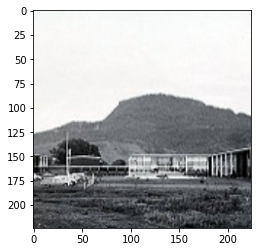

In [ ]:
plt.imshow(cv2.imread('/content/drive/MyDrive/Project_image/landscape/landscape/resized/buildings/0.jpg'))

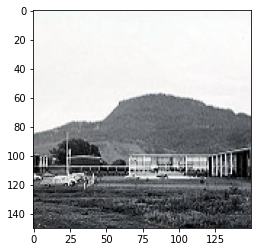

In [ ]:
plt.imshow(cv2.imread('/content/drive/MyDrive/Project_image/landscape/landscape/images/buildings/0.jpg'))

In [ ]:
splitfolders.ratio('/content/drive/MyDrive/Project_image/food/resized', output='/content/drive/MyDrive/Project_image/food/dataset', seed=77, ratio=(0.6, 0.2, 0.2))

Copying files: 101000 files [21:05, 79.84 files/s]


In [ ]:
splitfolders.ratio('/content/drive/MyDrive/Project_image/landscape/landscape/resized', output='/content/drive/MyDrive/Project_image/landscape/landscape/dataset', seed=77, ratio=(0.6, 0.2, 0.2))

Copying files: 6000 files [01:37, 61.66 files/s]


In [ ]:
folder_path = '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/train'
dataset = {}

# 이미지와 라벨 리스트에 담기
for label in os.listdir(folder_path):
    sub_path = folder_path+'/'+label+'/'
    dataset[label] = []
    for filename in os.listdir(sub_path):
        dataset[label].append(sub_path+filename)

dataset

{'buildings': ['/content/drive/MyDrive/Project_image/landscape/landscape/dataset/train/buildings/8705.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/train/buildings/8241.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/train/buildings/4466.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/train/buildings/7509.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/train/buildings/4016.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/train/buildings/8159.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/train/buildings/8390.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/train/buildings/1760.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/train/buildings/7443.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/train/buildings/5743.jpg',
  '/content/drive/MyDrive/Project_ima

In [ ]:
label2index = {'buildings' : 0, 'forest' : 1 , 'glacier' : 2 , 'mountain' : 3,
               'sea' : 4, 'street' : 5}

In [ ]:
x_train, y_train = [], []

for label, filenames in dataset.items():
    for filename in filenames:
        image = cv2.imread(filename) # img를 array 형태로 변경

        x_train.append(image)
        y_train.append(label2index[label]) # label을 index로 변경

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = x_train.astype('float32')

In [ ]:
x_train.shape, y_train.shape

((3600, 224, 224, 3), (3600,))

## Trainset Augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

In [ ]:
folder_path

'/content/drive/MyDrive/Project_image/landscape/landscape/dataset/train'

In [ ]:
for label in  os.listdir(folder_path):
    label_path = folder_path + '/' + label + '/'
    for filename in os.listdir(label_path): 
        filepath = label_path + filename

        img = load_img(filepath)
        # img 출력
        # plt.imshow(img)
        # break
        x = img_to_array(img)
        # x.shape 출력
        # print(x.shape)
        # break
        x = x.reshape((1,) + x.shape)

        i = 0
        # flow : augmentation 함수
        for batch in datagen.flow(x, batch_size=1,
                                save_to_dir=label_path, save_prefix=label, save_format='jpg'):
            i += 1
            if i > 1:
                break  

In [ ]:
folder_path = '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/train'
dataset = {}

# 이미지와 라벨 리스트에 담기
for label in os.listdir(folder_path):
    sub_path = folder_path+'/'+label+'/'
    dataset[label] = []
    for filename in os.listdir(sub_path):
        dataset[label].append(sub_path+filename)

dataset

{'buildings': ['/content/drive/MyDrive/Project_image/landscape/landscape/dataset/train/buildings/8705.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/train/buildings/8241.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/train/buildings/4466.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/train/buildings/7509.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/train/buildings/4016.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/train/buildings/8159.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/train/buildings/8390.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/train/buildings/1760.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/train/buildings/7443.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/train/buildings/5743.jpg',
  '/content/drive/MyDrive/Project_ima

In [ ]:
label2index = {'buildings' : 0, 'forest' : 1 , 'glacier' : 2 , 'mountain' : 3,
               'sea' : 4, 'street' : 5}

In [ ]:
x_train, y_train = [], []

for label, filenames in dataset.items():
    for filename in filenames:
        image = cv2.imread(filename) # img를 array 형태로 변경

        x_train.append(image)
        y_train.append(label2index[label]) # label을 index로 변경

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = x_train.astype('float32')

In [ ]:
x_train.shape, y_train.shape

((10345, 224, 224, 3), (10345,))

## Load validataion data, test data

In [ ]:
folder_path = '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/val'
dataset = {}

# 이미지와 라벨 리스트에 담기
for label in os.listdir(folder_path):
    sub_path = folder_path+'/'+label+'/'
    dataset[label] = []
    for filename in os.listdir(sub_path):
        dataset[label].append(sub_path+filename)

dataset

{'buildings': ['/content/drive/MyDrive/Project_image/landscape/landscape/dataset/val/buildings/810.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/val/buildings/1204.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/val/buildings/6956.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/val/buildings/4895.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/val/buildings/7010.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/val/buildings/4860.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/val/buildings/3477.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/val/buildings/3670.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/val/buildings/1242.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/val/buildings/7755.jpg',
  '/content/drive/MyDrive/Project_image/landscape/landscap

In [ ]:
x_val, y_val = [], []

for label, filenames in dataset.items():
    for filename in filenames:
        image = cv2.imread(filename) # img를 array 형태로 변경

        x_val.append(image)
        y_val.append(label2index[label]) # label을 index로 변경

In [ ]:
x_val, y_val= np.array(x_val), np.array(y_val)

In [ ]:
x_val = x_val.astype('float32')

In [ ]:
x_val.shape, y_val.shape

((1200, 224, 224, 3), (1200,))

In [ ]:
folder_path = '/content/drive/MyDrive/Project_image/landscape/landscape/dataset/test'
dataset = {}

# 이미지와 라벨 리스트에 담기
for label in os.listdir(folder_path):
    sub_path = folder_path+'/'+label+'/'
    dataset[label] = []
    for filename in os.listdir(sub_path):
        dataset[label].append(sub_path+filename)

dataset

NameError: ignored

In [ ]:
x_test, y_test = [], []

for label, filenames in dataset.items():
    for filename in filenames:
        image = cv2.imread(filename) # img를 array 형태로 변경

        x_test.append(image)
        y_test.append(label2index[label]) # label을 index로 변경

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
x_test = x_test.astype('float32')

In [ ]:
x_test.shape, y_test.shape

((1200, 224, 224, 3), (1200,))

## Zero Centering

In [ ]:
def zero_mean(image):
    # zero-centering
    return np.mean(image, axis=0)

In [ ]:
zero_mean_img = zero_mean(x_train)

In [ ]:
zero_mean_img.shape

(224, 224, 3)

In [ ]:
x_train -= zero_mean_img

In [ ]:
x_val -= zero_mean_img
# x_test -= zero_mean_img

# 01 Deeplearning Basic Modeling

In [ ]:
import tensorflow as tf

tf.__version__

'2.9.2'

In [ ]:
from tensorflow.keras import datasets, layers, models #Tensorflow에 있는 Keras 함수들 호출하기

In [ ]:
x_train

array([[[[ -72.37111   ,   17.309998  ,   35.623055  ],
         [-104.240005  ,  -12.680283  ,    5.68528   ],
         [-135.82584   ,  -40.900284  ,  -20.793335  ],
         ...,
         [  51.80278   ,   99.65889   ,  110.63416   ],
         [  68.99916   ,  109.97722   ,  119.79528   ],
         [  82.126114  ,  118.04639   ,  128.92      ]],

        [[ -45.246674  ,   39.57611   ,   58.764168  ],
         [ -92.29584   ,   -4.656952  ,   13.672226  ],
         [-138.92334   ,  -47.01306   ,  -26.885002  ],
         ...,
         [ -32.36972   ,   22.398895  ,   31.41111   ],
         [  15.841385  ,   63.763336  ,   74.61611   ],
         [  66.153336  ,  112.861115  ,  121.884445  ]],

        [[ -17.243607  ,   61.660004  ,   83.7875    ],
         [ -77.485     ,    3.2316742 ,   25.511948  ],
         [-141.34305   ,  -56.354996  ,  -35.24389   ],
         ...,
         [-112.62944   ,  -47.916107  ,  -39.83806   ],
         [ -52.32666   ,   15.52861   ,   22.437225  ],
  

In [ ]:
x_train.shape, y_train.shape

((10345, 224, 224, 3), (10345,))

In [ ]:
import numpy as np
n_class = np.unique(y_train).shape[0]
n_class

6

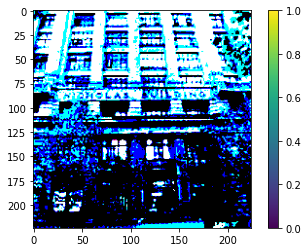

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [ ]:
y_train[0]

0

In [ ]:
# 데이터셋 안에 label의 이름이 없기 때문에, 직접 넣어줍니다.
label_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [ ]:
label_names[y_train[0]]

'buildings'

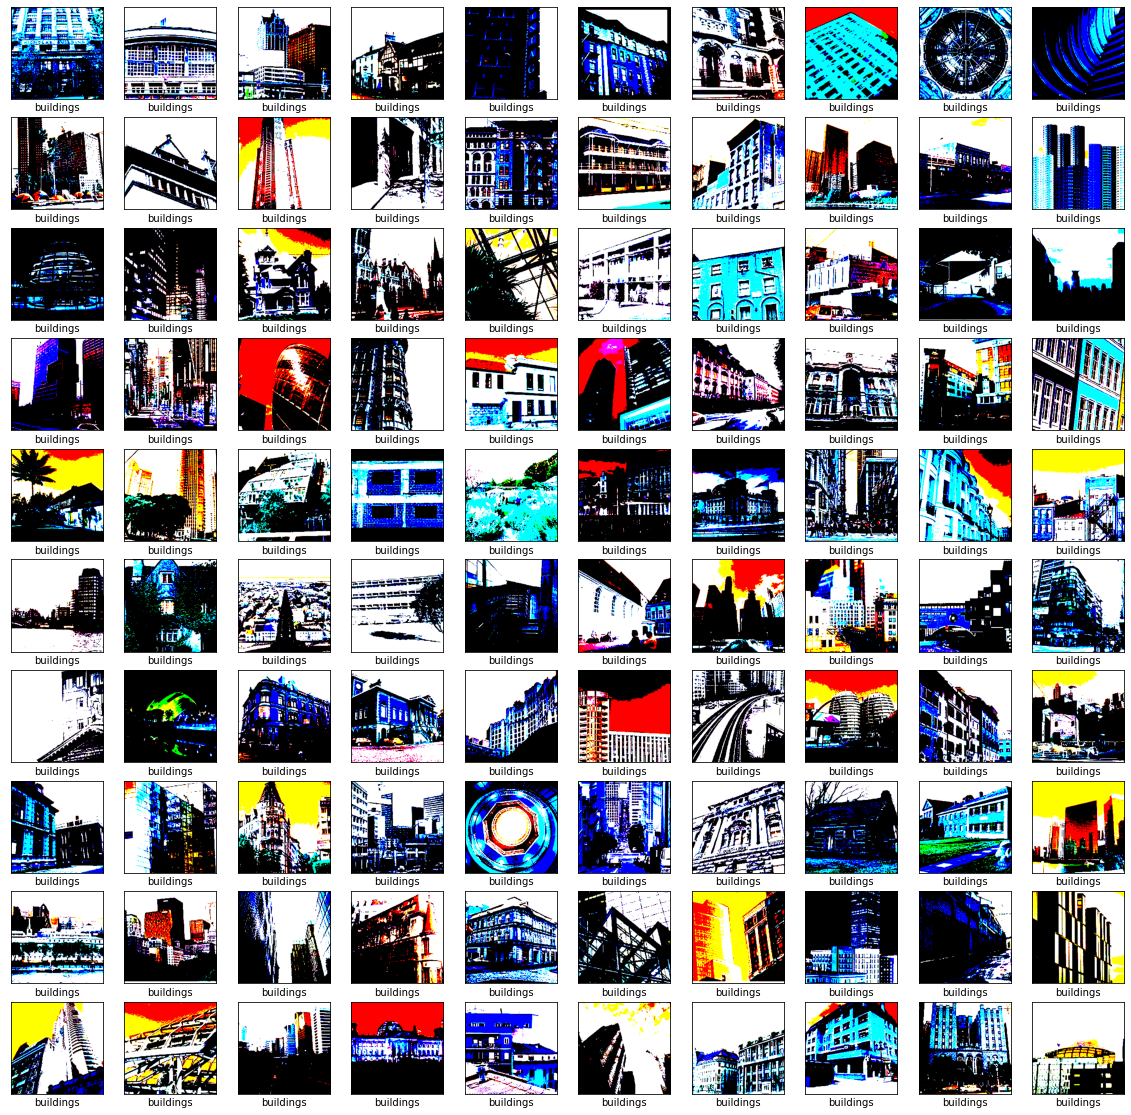

In [ ]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(label_names[y_train[i]])
plt.show()

### 2. 모델 구축 
- tf.keras.Sequential()
- 모델을 구축하는 가장 기본적인 방법으로 아래 두가지 방법이 있다.
1. model = tf.keras.Sequntial([ 입력층 , 은닉1층 , 은닉2층 , ... 출력층 ]) 와 같이, 리스트 형식으로 각 층을 묶어서 선언한다.
2. model = tf.keras.Sequential() 선언 후, model.add()를 이용해 한 층씩 쌓아준다.
  
- 입력층에서 가장 기본적인 방법은 Flatten()을 이용하여 1차원 형태로 받는 것이다.
    - Flatten()에서는 입력받을 데이터의 input_shape을 설정해줘야 한다.
- 각 층의 가장 기본적인 형태는 Dense()를 이용하여 "완전연결계층"형태로 구성하는 것이다.
    - Dense()에서는 먼저 뉴런의 개수(노드의 개수)를 설정해줘야 한다.
    - 활성화 함수 종류, 초기화방법 등을 설정해줄 수 있다.


In [ ]:
# 기본 모델 = 완전연결계층 = Dense
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.Dense(256, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.Dense(6, activation='softmax', kernel_initializer='glorot_uniform', bias_initializer='zeros')
])

### 3. 모델 컴파일
모델을 훈련하기 전에 필요한 몇 가지 설정이 모델 컴파일 단계에서 추가됩니다:

- 옵티마이저(Optimizer) : 모델의 업데이트 방법(최적화 방법) 설정
    - adam, rmsprop, adagrad, sgd etc.
- 손실 함수(Loss function) : 훈련 시, 오차 측정 방식 설정  
    - binary_crossentropy : 이진 분류 시 사용
    - categorical_crossentropy : 다중 분류 시 one hot encoding label일 때 사용 
    - sparse_categorical_crossentropy : 다중 분류 시 정수형 label일 때 사용
- 지표(Metrics) : 훈력 시, 학습데이터과 검증데이터의 평가 지표 설정
    - 기본적으로 리스트 형태로 받도록 설정
    - accuracy, auc, precision, recall etc.
  
기본적으로 문자열 형태로 지정해주지만, 직접 함수를 지정해줄 수 있다.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 4. 모델 훈련
신경망 모델을 훈련하는 단계는 다음과 같습니다:  
.  
훈련 데이터를 모델에 주입합니다-이 예에서는 train_images와 train_labels 배열입니다.  
모델이 train img와 train label의 관계를 학습힙니다.
- epochs : 학습데이터셋 학습 반복 횟수 
    - 책 몇 epoch 돌렸어? (책 몇번 봤어?)  
- batch_size : 1회 업데이트 시 학습하는 데이터 량
    - 한번 공부할 때 batch size가 어떻게 돼? (한번 공부할 때 몇 페이지씩 봐?)
- validation_data : 훈련 단계에서 검증할 데이터셋
- verbose : 시각화 방식

In [ ]:
model.fit(x_train, y_train, epochs=20, verbose=1, batch_size=112,
          validation_data=(x_val, y_val))

Epoch 1/20
33/33 [==============================] - 32s 907ms/step - loss: 1704.5084 - accuracy: 0.3767 - val_loss: 2107.8220 - val_accuracy: 0.3000
Epoch 2/20
33/33 [==============================] - 30s 918ms/step - loss: 712.0844 - accuracy: 0.4886 - val_loss: 581.2598 - val_accuracy: 0.4258
Epoch 3/20
33/33 [==============================] - 30s 907ms/step - loss: 309.7427 - accuracy: 0.5714 - val_loss: 446.5007 - val_accuracy: 0.4642
Epoch 4/20
33/33 [==============================] - 32s 965ms/step - loss: 229.5564 - accuracy: 0.5953 - val_loss: 375.2368 - val_accuracy: 0.4858
Epoch 5/20
33/33 [==============================] - 29s 891ms/step - loss: 141.9203 - accuracy: 0.6536 - val_loss: 314.8477 - val_accuracy: 0.4458
Epoch 6/20
33/33 [==============================] - 29s 897ms/step - loss: 107.8614 - accuracy: 0.6825 - val_loss: 257.6949 - val_accuracy: 0.4733
Epoch 7/20
33/33 [==============================] - 30s 905ms/step - loss: 79.2780 - accuracy: 0.7156 - val_loss: 26

In [ ]:
model.fit(x_train, y_train, epochs=20, verbose=2, batch_size=32,
          validation_data=(x_val, y_val))

Epoch 1/20
113/113 - 54s - loss: 198.5024 - accuracy: 0.5172 - val_loss: 3.4714 - val_accuracy: 0.1750 - 54s/epoch - 475ms/step
Epoch 2/20
113/113 - 53s - loss: 2.0831 - accuracy: 0.1556 - val_loss: 1.8184 - val_accuracy: 0.1692 - 53s/epoch - 466ms/step
Epoch 3/20
113/113 - 51s - loss: 1.7872 - accuracy: 0.1656 - val_loss: 1.8215 - val_accuracy: 0.1667 - 51s/epoch - 453ms/step
Epoch 4/20
113/113 - 51s - loss: 1.7869 - accuracy: 0.1686 - val_loss: 1.8214 - val_accuracy: 0.1667 - 51s/epoch - 454ms/step
Epoch 5/20
113/113 - 51s - loss: 1.7867 - accuracy: 0.1642 - val_loss: 1.8214 - val_accuracy: 0.1692 - 51s/epoch - 449ms/step
Epoch 6/20


KeyboardInterrupt: ignored

In [ ]:
# 초기화 후 재실행
model.fit(x_train, y_train, epochs=20, verbose=1, batch_size=32,
          validation_data=(x_val, y_val))

Epoch 1/20
113/113 [==============================] - 56s 478ms/step - loss: 1402.9248 - accuracy: 0.3800 - val_loss: 534.2089 - val_accuracy: 0.4567
Epoch 2/20
113/113 [==============================] - 54s 474ms/step - loss: 190.4167 - accuracy: 0.3639 - val_loss: 6.1079 - val_accuracy: 0.2017
Epoch 3/20
113/113 [==============================] - 52s 458ms/step - loss: 3.0721 - accuracy: 0.2033 - val_loss: 3.2418 - val_accuracy: 0.1908
Epoch 4/20
113/113 [==============================] - 51s 455ms/step - loss: 1.9785 - accuracy: 0.2011 - val_loss: 2.3683 - val_accuracy: 0.1825
Epoch 5/20
113/113 [==============================] - 54s 478ms/step - loss: 1.8804 - accuracy: 0.2014 - val_loss: 3.0651 - val_accuracy: 0.1892
Epoch 6/20
113/113 [==============================] - 52s 459ms/step - loss: 1.7715 - accuracy: 0.2042 - val_loss: 2.8860 - val_accuracy: 0.1925
Epoch 7/20
 79/113 [===================>..........] - ETA: 14s - loss: 1.7251 - accuracy: 0.2073

KeyboardInterrupt: ignored

In [ ]:
# 초기화 후 재실행
model.fit(x_train, y_train, epochs=20, verbose=1, batch_size=640,
          validation_data=(x_val, y_val))

Epoch 1/20
6/6 [==============================] - 24s 4s/step - loss: 3681.4160 - accuracy: 0.3072 - val_loss: 2675.5442 - val_accuracy: 0.4083
Epoch 2/20
6/6 [==============================] - 22s 4s/step - loss: 1978.0820 - accuracy: 0.4233 - val_loss: 1719.5869 - val_accuracy: 0.3842
Epoch 3/20
6/6 [==============================] - 22s 4s/step - loss: 1120.1937 - accuracy: 0.4728 - val_loss: 1158.2468 - val_accuracy: 0.4275
Epoch 4/20
6/6 [==============================] - 22s 4s/step - loss: 740.0939 - accuracy: 0.5556 - val_loss: 931.3063 - val_accuracy: 0.4675
Epoch 5/20
6/6 [==============================] - 23s 4s/step - loss: 534.2504 - accuracy: 0.5686 - val_loss: 779.5488 - val_accuracy: 0.4575
Epoch 6/20
6/6 [==============================] - 22s 4s/step - loss: 319.3203 - accuracy: 0.6617 - val_loss: 658.1184 - val_accuracy: 0.4750
Epoch 7/20
6/6 [==============================] - 25s 4s/step - loss: 203.8327 - accuracy: 0.7264 - val_loss: 653.7127 - val_accuracy: 0.4625


In [ ]:
# 기본 모델 = 완전연결계층 = Dense
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.Dense(256, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.Dense(32, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.Dense(6, activation='softmax', kernel_initializer='glorot_uniform', bias_initializer='zeros')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 초기화 후 재실행
model.fit(x_train, y_train, epochs=20, verbose=1, batch_size=450,
          validation_data=(x_val, y_val))

Epoch 1/20
8/8 [==============================] - 24s 3s/step - loss: 842.8317 - accuracy: 0.3028 - val_loss: 571.2388 - val_accuracy: 0.3808
Epoch 2/20
8/8 [==============================] - 24s 3s/step - loss: 414.4064 - accuracy: 0.3953 - val_loss: 372.7820 - val_accuracy: 0.3633
Epoch 3/20
8/8 [==============================] - 22s 3s/step - loss: 263.0891 - accuracy: 0.4250 - val_loss: 289.4956 - val_accuracy: 0.4242
Epoch 4/20
8/8 [==============================] - 22s 3s/step - loss: 179.2654 - accuracy: 0.5078 - val_loss: 215.0232 - val_accuracy: 0.4325
Epoch 5/20
8/8 [==============================] - 22s 3s/step - loss: 145.0000 - accuracy: 0.5519 - val_loss: 169.2840 - val_accuracy: 0.4050
Epoch 6/20
8/8 [==============================] - 22s 3s/step - loss: 87.6175 - accuracy: 0.5803 - val_loss: 142.2449 - val_accuracy: 0.4500
Epoch 7/20
8/8 [==============================] - 22s 3s/step - loss: 60.8447 - accuracy: 0.6344 - val_loss: 130.5431 - val_accuracy: 0.4375
Epoch 8/

In [ ]:
# import matplotlib.pyplot as plt
# Fit the model
results = model.fit(x_train, y_train, epochs=20, verbose=1, batch_size=100, validation_data=(x_val, y_val))
# # list all data in history
print(results.history.keys())
# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/20
104/104 [==============================] - 81s 769ms/step - loss: 1093.3109 - accuracy: 0.3580 - val_loss: 2692.1001 - val_accuracy: 0.2083
Epoch 2/20
104/104 [==============================] - 79s 760ms/step - loss: 199.0953 - accuracy: 0.3970 - val_loss: 1.8163 - val_accuracy: 0.1675
Epoch 3/20
104/104 [==============================] - 78s 752ms/step - loss: 5.7155 - accuracy: 0.2043 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 4/20
 88/104 [========================>.....] - ETA: 12s - loss: 1.9470 - accuracy: 0.1908

KeyboardInterrupt: ignored

In [ ]:
print(results.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
results.history

{'loss': [17.91368293762207, 12.365274429321289, 11.511063575744629],
 'accuracy': [0.820555567741394, 0.846666693687439, 0.8638888597488403],
 'val_loss': [108.99736022949219, 110.20697784423828, 101.1538314819336],
 'val_accuracy': [0.48750001192092896,
  0.44749999046325684,
  0.45916667580604553]}

Epoch 1/20
17/17 [==============================] - 64s 4s/step - loss: 2382.4907 - accuracy: 0.3103 - val_loss: 1103.6837 - val_accuracy: 0.3733
Epoch 2/20
17/17 [==============================] - 59s 3s/step - loss: 899.8589 - accuracy: 0.3896 - val_loss: 815.1387 - val_accuracy: 0.3300
Epoch 3/20
17/17 [==============================] - 59s 3s/step - loss: 569.3448 - accuracy: 0.4416 - val_loss: 561.1017 - val_accuracy: 0.3825
Epoch 4/20
17/17 [==============================] - 63s 4s/step - loss: 367.9568 - accuracy: 0.4891 - val_loss: 315.0875 - val_accuracy: 0.4575
Epoch 5/20
17/17 [==============================] - 59s 3s/step - loss: 208.1820 - accuracy: 0.5593 - val_loss: 372.1178 - val_accuracy: 0.3675
Epoch 6/20
17/17 [==============================] - 60s 4s/step - loss: 203.2228 - accuracy: 0.5732 - val_loss: 256.6936 - val_accuracy: 0.4300
Epoch 7/20
17/17 [==============================] - 63s 4s/step - loss: 121.6015 - accuracy: 0.6399 - val_loss: 272.7508 - val_accurac

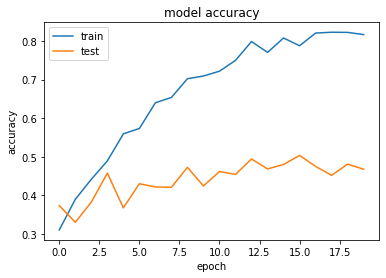

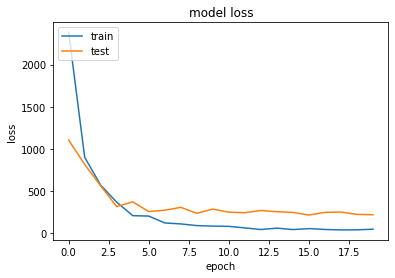

In [ ]:
# import matplotlib.pyplot as plt
# Fit the model
results = model.fit(x_train, y_train, epochs=20, verbose=1, batch_size=640, validation_data=(x_val, y_val))
# # list all data in history
print(results.history.keys())
# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()